In [1]:
#import the required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [2]:
data=pd.read_csv(r"C:\Users\eswar.melam\OneDrive - Qentelli\Desktop\Project\Amazon Sale Report.csv")

In [3]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
index                 128975 non-null int64
Order ID              128975 non-null object
Date                  128975 non-null object
Status                128975 non-null object
Fulfilment            128975 non-null object
Sales Channel         128975 non-null object
ship-service-level    128975 non-null object
Style                 128975 non-null object
SKU                   128975 non-null object
Category              128975 non-null object
Size                  128975 non-null object
ASIN                  128975 non-null object
Courier Status        122103 non-null object
Qty                   128975 non-null int64
currency              121180 non-null object
Amount                121180 non-null float64
ship-city             128942 non-null object
ship-state            128942 non-null object
ship-postal-code      128942 non-null float64
ship-country          128942 non-n

In [5]:
#Checking the null values
data.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [6]:
#Checking for duplicates
data.duplicated().sum()


0

In [7]:
#Checking the number of rows and columns
data.shape

(128975, 24)

In [8]:
#Checking the column names
data.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [9]:
df=data.copy()

In [10]:
#clean the column names
col = [element.lower().replace(" ","").replace("-","") for element in df.columns]
df.columns = col
    

In [11]:
# drop the redundant features for the purpose of this analysis
df.drop(["index","date","fulfilledby","currency","unnamed:22","promotionids","courierstatus","shipcountry"],
        axis ="columns", inplace = True)


In [12]:
 # fill value "unknown" in rows where location (city and state) is not known 
df["shipstate"].fillna("unknown", inplace = True)
df["shipcity"].fillna("unknown", inplace = True)


In [13]:
# fill value 0 in rows where postalcode is null
df["shippostalcode"].fillna(0, inplace = True)
#change dtype of postalcode to int
df["shippostalcode"] = df["shippostalcode"].astype(int).astype(object)


In [14]:
#Checking the unique names of the state
df['shipstate'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'unknown', 'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [15]:
#Standardizing the data
df.loc[df['shipstate'].isin(['GOA','goa']),'shipstate'] = 'Goa'
df.loc[df['shipstate'].isin(['rajsthan','Rajasthan','rajasthan','Rajshthan','Rajsthan','RAJASTHAN', 'RJ']),'shipstate'] = 'Rajasthan'
df.loc[df['shipstate'].isin(['Punjab/Mohali/Zirakpur','PB','punjab','PUNJAB']),'shipstate'] = 'Punjab'
df.loc[df['shipstate'].isin([ 'AR','Arunachal pradesh','ARUNACHAL PRADESH']),'shipstate'] = 'Arunachal Pradesh'
df.loc[df['shipstate'].isin(['NL','NAGALAND']),'shipstate'] = 'Nagaland'
df.loc[df['shipstate'].isin(['Puducherry']),'shipstate'] = 'Pondicherry'
df.loc[df['shipstate'].isin(['orissa','Odisha','ODISHA']),'shipstate'] = 'Orissa'
df.loc[df['shipstate'].isin(['SIKKIM']),'shipstate'] = 'Sikkim'
df.loc[df['shipstate'].isin(['bihar']),'shipstate'] = 'Bihar'
df.loc[df['shipstate'].isin(['CHANDIGARH']),'shipstate'] = 'Chandigarh'
df.loc[df['shipstate'].isin(['delhi','New Delhi','DELHI']),'shipstate'] = 'Delhi'

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128969 entries, 0 to 128974
Data columns (total 16 columns):
orderid             128969 non-null object
status              128969 non-null object
fulfilment          128969 non-null object
saleschannel        128969 non-null object
shipservicelevel    128969 non-null object
style               128969 non-null object
sku                 128969 non-null object
category            128969 non-null object
size                128969 non-null object
asin                128969 non-null object
qty                 128969 non-null int64
amount              121177 non-null float64
shipcity            128969 non-null object
shipstate           128969 non-null object
shippostalcode      128969 non-null object
b2b                 128969 non-null bool
dtypes: bool(1), float64(1), int64(1), object(13)
memory usage: 15.9+ MB


In [18]:
# dataframe of repeated orderid(s) - all rows
orderid_repeat_rows = df[df["orderid"].duplicated(keep = False)]

# count the unique repeated orderid(s)
unique_orderid_repeat_count = orderid_repeat_rows["orderid"].nunique()

# count the total number of rows in the dataset occupied by repeated orders
orderid_repeat_rows_count = len(orderid_repeat_rows)

# count the number of rows in the dataset occuppied by nonrepeat_orderids
orderid_nonrepeat_rows = df[df["orderid"].duplicated(keep = False) == False]
orderid_nonrepeat_rows_count = len(orderid_nonrepeat_rows)


In [19]:
 print(f"1. Number of unique orderid with multiple products per orderid purchased: {unique_orderid_repeat_count}\n"
         f"2. Total number of rows of these orderid(s) with multiple products: {orderid_repeat_rows_count}\n"
          f"3. Number of unique orderid with single product per orderid purchased: {orderid_nonrepeat_rows_count}"
         )

1. Number of unique orderid with multiple products per orderid purchased: 6840
2. Total number of rows of these orderid(s) with multiple products: 15431
3. Number of unique orderid with single product per orderid purchased: 113538


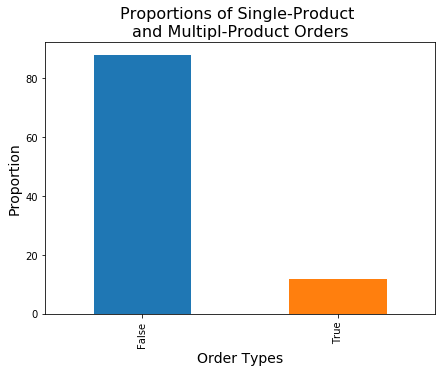

In [20]:
# bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in a pandas.Series
orderid_repeat_rows = df[df["orderid"].duplicated(keep = False)]
unique_orderid_repeat_list = orderid_repeat_rows["orderid"].unique()
plot_dataseries = round(df["orderid"].isin(unique_orderid_repeat_list).
                        value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax)
plt.title("Proportions of Single-Product \nand Multipl-Product Orders", fontsize = 16)
plt.ylabel("Proportion", fontsize = 14)
plt.xlabel("Order Types", fontsize = 14)
plt.show()

In [21]:
df.columns

Index(['orderid', 'status', 'fulfilment', 'saleschannel', 'shipservicelevel',
       'style', 'sku', 'category', 'size', 'asin', 'qty', 'amount', 'shipcity',
       'shipstate', 'shippostalcode', 'b2b'],
      dtype='object')

In [22]:
# drop the orderids with multiple products
df = df[df["orderid"].duplicated(keep = False) == False]

# drop redundant column "orderid"
df.drop("orderid", axis = 1, inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113538 entries, 0 to 128974
Data columns (total 15 columns):
status              113538 non-null object
fulfilment          113538 non-null object
saleschannel        113538 non-null object
shipservicelevel    113538 non-null object
style               113538 non-null object
sku                 113538 non-null object
category            113538 non-null object
size                113538 non-null object
asin                113538 non-null object
qty                 113538 non-null int64
amount              106449 non-null float64
shipcity            113538 non-null object
shipstate           113538 non-null object
shippostalcode      113538 non-null object
b2b                 113538 non-null bool
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 13.1+ MB


In [23]:
df["status"].unique()


array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [24]:
# drop the rows with unsure rejection status
known_value = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller','Shipped - Delivered to Buyer']
df = df[df["status"].isin(known_value)]   

# create a col "rejected" where value 1 means rejected and 0 means not-rejected" 
rejected = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller']
df["rejected"] = df["status"].isin(rejected).astype(int)    # change the dtype to "int" 

# drop col "status" 
df.drop("status",axis = "columns", inplace = True)


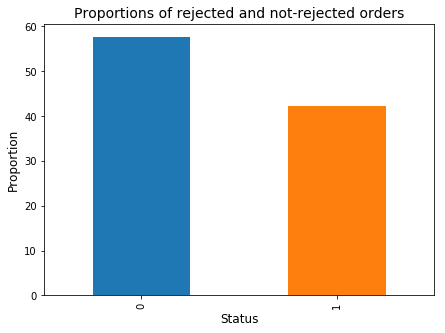

In [25]:
# bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in a pandas.Series
plot_dataseries = round(df["rejected"].value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax)
plt.title("Proportions of rejected and not-rejected orders", fontsize = 14)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)    
plt.show()


In [26]:
df.select_dtypes(include = "object").nunique()


fulfilment             2
saleschannel           2
shipservicelevel       2
style               1148
sku                 5291
category               8
size                  11
asin                5290
shipcity            5293
shipstate             41
shippostalcode      6852
dtype: int64

In [27]:
df.drop(["style","sku","shipcity","shippostalcode","asin"],axis = 1, inplace = True)


In [28]:
# create a pandas dataframe calculating the 
# porportion (and number of occurence) of the "qty" values

# calculate the respective "proportions" of values in "qty" 
qty_prop = round(df["qty"].value_counts(normalize = True)*100,2)

#  rename series with "Proportion(%)", sort by index and change to dateframe
qty_prop = qty_prop.rename("Proportion(%)").sort_index().to_frame()

# rename index.name with "qty_value" and 
qty_prop.index.name = "qty_value"

# add col "count"
qty_prop["Count"] = df["qty"].value_counts()

# change dtype of "Proportion(%)" column and concat string "%"
qty_prop["Proportion(%)"] = (
    qty_prop["Proportion(%)"].astype(str)
    .str.cat(np.full(fill_value = "%",shape = (len(qty_prop),)))
)

qty_prop


,Proportion(%),Count
qty_value,,
0,26.46%,11379
1,73.3%,31518
2,0.21%,90
3,0.02%,8
4,0.01%,3
5,0.0%,2


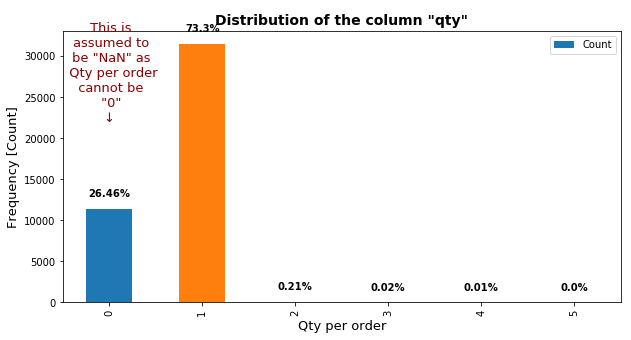

In [29]:
# Plot distribution of Quantity per order
# Plot a figure to represent data of the above table(dataframe)
fig, ax = plt.subplots(figsize = (10,5))
qty_prop.plot(kind = "bar",y = "Count",ax = ax)
plt.xlabel("Qty per order", fontsize = 13)
plt.ylabel("Frequency [Count]",fontsize = 13)
plt.title('Distribution of the column "qty"', fontsize = 14,fontweight = 550)
for x,y in enumerate(qty_prop["Count"]):
    qty_value = qty_prop.index[x]
    plt.text(x,y+1500,qty_prop["Proportion(%)"].loc[qty_value],
            horizontalalignment = "center",fontweight = 700)
        
plt.text(0,22000,'\n This is\n assumed to\n be "NaN" as\n  Qty per order\n  cannot be \n "0"\n↓',
         horizontalalignment = "center",color = "darkred", fontsize = 13)
plt.show()


In [30]:
# drop feature "qty"
df.drop("qty", axis = "columns", inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 0 to 128969
Data columns (total 9 columns):
fulfilment          43000 non-null object
saleschannel        43000 non-null object
shipservicelevel    43000 non-null object
category            43000 non-null object
size                43000 non-null object
amount              36034 non-null float64
shipstate           43000 non-null object
b2b                 43000 non-null bool
rejected            43000 non-null int32
dtypes: bool(1), float64(1), int32(1), object(6)
memory usage: 2.8+ MB


In [31]:
amount0 = len(df[df["amount"] == 0])
f"The number of datapoints/orderids/rows) having amount value as 0 is:   {amount0}"


'The number of datapoints/orderids/rows) having amount value as 0 is:   769'

In [32]:
df["amount"] = df["amount"].replace(0,np.nan)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 0 to 128969
Data columns (total 9 columns):
fulfilment          43000 non-null object
saleschannel        43000 non-null object
shipservicelevel    43000 non-null object
category            43000 non-null object
size                43000 non-null object
amount              35265 non-null float64
shipstate           43000 non-null object
b2b                 43000 non-null bool
rejected            43000 non-null int32
dtypes: bool(1), float64(1), int32(1), object(6)
memory usage: 2.8+ MB


In [33]:
df
df.duplicated().sum()

18520

In [34]:
df.isnull().sum()

fulfilment             0
saleschannel           0
shipservicelevel       0
category               0
size                   0
amount              7735
shipstate              0
b2b                    0
rejected               0
dtype: int64

In [35]:
df.head(2)

,fulfilment,saleschannel,shipservicelevel,category,size,amount,shipstate,b2b,rejected
0,Merchant,Amazon.in,Standard,Set,S,647.62,MAHARASHTRA,False,1
1,Merchant,Amazon.in,Standard,kurta,3XL,406.00,KARNATAKA,False,0


In [36]:
mean_value = df['amount'].mean()
df['amount'].fillna(value=mean_value, inplace=True)


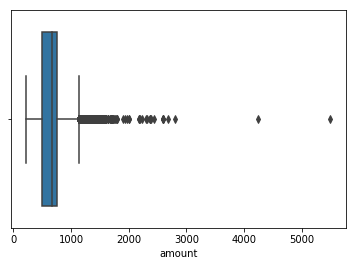

In [37]:
sns.boxplot(x=df['amount'])
plt.show()

In [38]:
# Z-score method
from scipy import stats

z_scores = stats.zscore(df['amount'])
threshold = 3  # Adjust the threshold based on your data
outliers = (abs(z_scores) > threshold)

# IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR)))


In [39]:
# Remove outliers
df_no_outliers = df[~outliers]

# Impute outliers (replace with a suitable value)
replacement_value = df['amount'].median()
df['amount'][outliers] = replacement_value


In [40]:
# transformation
df['amount'] = np.log1p(df['amount'])


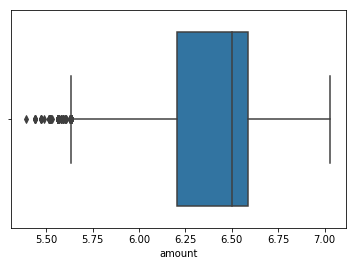

In [41]:
sns.boxplot(x=df['amount'])
plt.show()

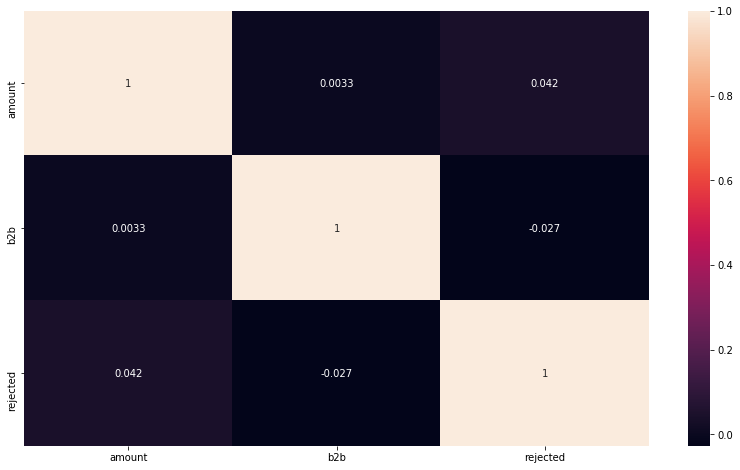

In [42]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

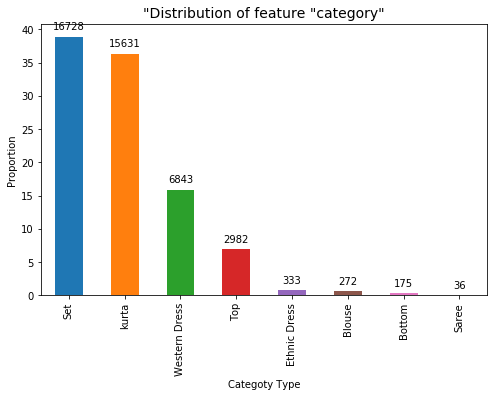

In [43]:
fig,ax = plt.subplots(figsize = (8,5))
df_cat = df["category"].value_counts().to_frame()
df_cat["proportion"] = round(df["category"].value_counts(normalize = True)*100,2)
df_cat["proportion_label"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"category":"count","index":"category_type"}))

df_cat.plot(
    kind = "bar", x = "category_type",y = "proportion",
    legend = "", ax = ax
)
plt.xlabel("Categoty Type")
plt.ylabel("Proportion")
plt.title('"Distribution of feature "category"', fontsize = 14)
for x,y in enumerate(df_cat["count"]):
    plt.text(x,1+df_cat["proportion"][x],y,
             fontsize = 10, horizontalalignment = "center")
plt.show()

In [44]:
# change the data type of feature "b2b" to object
df["b2b"] = df["b2b"].astype(object)


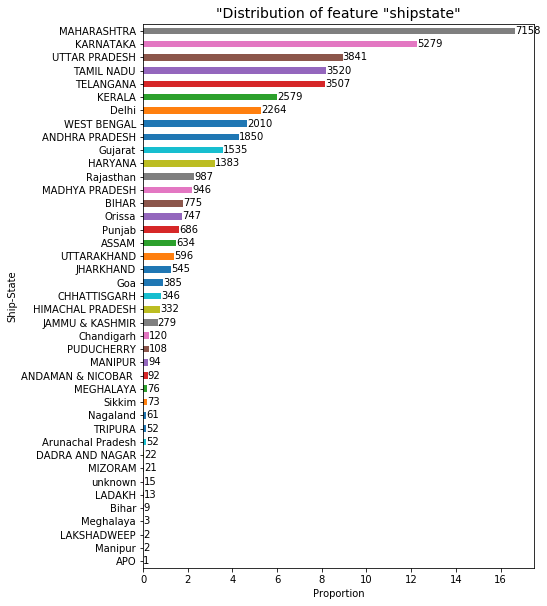

In [45]:
#create a dataframe to check the proportion of unique value types (shipstate_type)
df_cat = df["shipstate"].value_counts().to_frame()
df_cat["proportion"] = round(df["shipstate"].value_counts(normalize = True)*100,2)
df_cat["proportion_str"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"shipstate":"count","index":"shipstate_type"}))

df_cat = df_cat.sort_values(by = "proportion").reset_index(drop = True)
fig,ax = plt.subplots(figsize = (7,10))

df_cat.plot(
    kind = "barh", x = "shipstate_type",y = "proportion",
    legend = "", ax = ax
)
plt.ylabel("Ship-State")
plt.xlabel("Proportion")
plt.title('"Distribution of feature "shipstate"', fontsize = 14)
for x,y in enumerate(df_cat["count"]):
    plt.text((df_cat["proportion"][x]),x,y,
             fontsize = 10, verticalalignment = "center")
plt.show()


In [46]:
df.head()

,fulfilment,saleschannel,shipservicelevel,category,size,amount,shipstate,b2b,rejected
0,Merchant,Amazon.in,Standard,Set,S,6.474847,MAHARASHTRA,False,1
1,Merchant,Amazon.in,Standard,kurta,3XL,6.008813,KARNATAKA,False,0
3,Merchant,Amazon.in,Standard,Western Dress,L,6.625830,PUDUCHERRY,False,1
7,Merchant,Amazon.in,Standard,kurta,S,5.991465,TELANGANA,False,0
8,Amazon,Amazon.in,Expedited,Set,3XL,6.501493,TELANGANA,False,1


In [47]:
df.select_dtypes(include = "object").nunique()


fulfilment           2
saleschannel         2
shipservicelevel     2
category             8
size                11
shipstate           41
b2b                  2
dtype: int64

In [48]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (e.g., drop or impute)
df = df.dropna()


Missing Values:
fulfilment          0
saleschannel        0
shipservicelevel    0
category            0
size                0
amount              0
shipstate           0
b2b                 0
rejected            0
dtype: int64


In [49]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Duplicate Rows:")
print(df[duplicate_rows])

# Remove duplicates
df = df.drop_duplicates()


Duplicate Rows:
       fulfilment saleschannel shipservicelevel       category  size  \
330        Amazon    Amazon.in        Expedited          kurta     M   
331        Amazon    Amazon.in        Expedited            Set   XXL   
344        Amazon    Amazon.in        Expedited            Set   XXL   
383      Merchant    Amazon.in         Standard          kurta     S   
495      Merchant    Amazon.in         Standard            Set   3XL   
509        Amazon    Amazon.in        Expedited          kurta    XL   
521        Amazon    Amazon.in        Expedited          kurta   XXL   
602        Amazon    Amazon.in        Expedited            Set   3XL   
675        Amazon    Amazon.in        Expedited            Set   XXL   
711        Amazon    Amazon.in        Expedited          kurta     M   
738      Merchant    Amazon.in         Standard          kurta     S   
834        Amazon    Amazon.in        Expedited          kurta    XL   
938      Merchant    Amazon.in         Standard 

In [50]:
# Check unique values in categorical columns
unique_values = df['category'].unique()
print("Unique Values:")
print(unique_values)


Unique Values:
['Set' 'kurta' 'Western Dress' 'Bottom' 'Top' 'Blouse' 'Ethnic Dress'
 'Saree']


In [52]:
bk=df.copy()

In [53]:
#Apply the LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['shipstate']=LE.fit_transform(df[['shipstate']])
df['category']=LE.fit_transform(df[['category']])
df['size']=LE.fit_transform(df[['size']])
df['b2b'] = LE.fit_transform(df[['b2b']])
df['fulfilment'] = LE.fit_transform(df[['fulfilment']])
df['shipservicelevel']=LE.fit_transform(df[['shipservicelevel']])
df['saleschannel']=LE.fit_transform(df[['saleschannel']])
df.head()

,fulfilment,saleschannel,shipservicelevel,category,size,amount,shipstate,b2b,rejected
0,1,0,1,4,7,6.474847,22,0,1
1,1,0,1,7,0,6.008813,17,0,0
3,1,0,1,6,5,6.625830,30,0,1
7,1,0,1,7,7,5.991465,35,0,0
8,0,0,0,4,0,6.501493,35,0,1


In [54]:
df.drop("saleschannel", axis = "columns", inplace = True)


In [55]:
df.head()

,fulfilment,shipservicelevel,category,size,amount,shipstate,b2b,rejected
0,1,1,4,7,6.474847,22,0,1
1,1,1,7,0,6.008813,17,0,0
3,1,1,6,5,6.625830,30,0,1
7,1,1,7,7,5.991465,35,0,0
8,0,0,4,0,6.501493,35,0,1


In [56]:
df['amount']= df['amount'].astype(int)

In [57]:
cat=df['category']
cat1=bk['category']
ful=df['fulfilment']
ful1=bk['fulfilment']
service=df['shipservicelevel']
service1=bk['shipservicelevel']
size=df['size']
size1=bk['size']
state=df['shipstate']
state1=bk['shipstate']
rej=df['rejected']
rej1=bk['rejected']

In [58]:
cat_mapping= dict(zip(cat, cat1))
ful_mapping=dict(zip(ful, ful1))
service_mapping=dict(zip(service, service1))
size_mapping=dict(zip(size, size1))
state_mapping=dict(zip(state, state1))
rej_mapping=dict(zip(rej,rej1))

# Print the mapping
#print("Encoded Sizes:", a)


In [59]:
print(rej_mapping)

{1: 1, 0: 0}


In [60]:
cat_mapping = pd.DataFrame(list(cat_mapping.items()), columns=['Encoded Value', 'CATEGORIES'])
ful_mapping= pd.DataFrame(list(ful_mapping.items()), columns=['Encoded Value', 'FULFILLMENT'])
size_mapping= pd.DataFrame(list(size_mapping.items()), columns=['Encoded Value', 'SIZE'])
state_mapping= pd.DataFrame(list(state_mapping.items()), columns=['Encoded Value', 'STATE'])
cat_mapping = cat_mapping.sort_values(by='Encoded Value')
ful_mapping = ful_mapping.sort_values(by='Encoded Value')
size_mapping = size_mapping.sort_values(by='Encoded Value')
state_mapping = state_mapping.sort_values(by='Encoded Value')


In [61]:
import pickle
with open('cat_mapping.pkl', 'wb') as file:
    pickle.dump(cat_mapping, file)
with open('ful_mapping.pkl', 'wb') as file:
    pickle.dump(ful_mapping, file)
with open('size_mapping.pkl', 'wb') as file:
    pickle.dump(size_mapping, file)
with open('state_mapping.pkl', 'wb') as file:
    pickle.dump(state_mapping, file)
    


In [62]:
#Seperate the Independent Variable And Target Variable
IndepVar = []
for col in df.columns:
    if col != 'rejected':
        IndepVar.append(col)

TargetVar = 'rejected'

x = df[IndepVar]
y = df[TargetVar]

In [63]:
#Split the Data into x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.35
                                               ,train_size=0.65,random_state=45)

In [64]:
print(f"Shape of X_train :{x_train.shape}\nShape of x_test: {x_test.shape}",
      f"\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train :(14816, 7)
Shape of x_test: (7979, 7) 
Shape of y_train: (14816,)
Shape of y_test: (7979,)


In [65]:
from imblearn.over_sampling import RandomOverSampler

In [66]:
# resample it (training dataset) using Random Over Sampling
ros = RandomOverSampler(random_state = 42)
x_train,y_train = ros.fit_resample(x_train,y_train)

# print the shape of the training and testing datasets
print(f"Shape of x_train_over :{x_train.shape}",
      f"\nShape of y_train_over: {y_train.shape}")


Shape of x_train_over :(17250, 7) 
Shape of y_train_over: (17250,)


In [67]:
#Apply the Standardization
#from sklearn.preprocessing import StandardScaler
#scalar=StandardScaler()
#x_train = scalar.fit_transform(x_train)
#x_test= scalar.transform(x_test)

In [68]:
#Load the Files to Save the Results
EMResults=pd.read_csv(r"C:\Users\eswar.melam\OneDrive - Qentelli\Desktop\Project\EMResults.csv")


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1452 1900]
 [   0 4627]]
Outcome values : 
 1452 1900 0 4627
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.43      0.60      3352
           0       0.71      1.00      0.83      4627

    accuracy                           0.76      7979
   macro avg       0.85      0.72      0.72      7979
weighted avg       0.83      0.76      0.74      7979

Accuracy : 76.2 %
Precision : 100.0 %
Recall : 43.3 %
F1 Score : 0.604
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 71.6 %
MCC : 0.554
roc_auc_score: 0.717


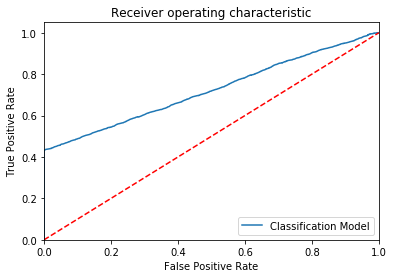

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1654 1698]
 [ 583 4044]]
Outcome values : 
 1654 1698 583 4044
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.49      0.59      3352
           0       0.70      0.87      0.78      4627

    accuracy                           0.71      7979
   macro avg       0.72      0.68      0.69      7979
weighted avg       0.72      0.71      0.70      7979

Accuracy : 71.4 %
Precision : 73.9 %
Recall : 49.3 %
F1 Score : 0.592
Specificity or True Negative Rate : 87.4 %
Balanced Accuracy : 68.4 %
MCC : 0.404
roc_auc_score: 0.684


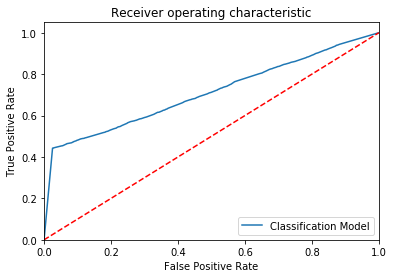

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1681 1671]
 [ 620 4007]]
Outcome values : 
 1681 1671 620 4007
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.50      0.59      3352
           0       0.71      0.87      0.78      4627

    accuracy                           0.71      7979
   macro avg       0.72      0.68      0.69      7979
weighted avg       0.72      0.71      0.70      7979

Accuracy : 71.3 %
Precision : 73.1 %
Recall : 50.1 %
F1 Score : 0.595
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 68.4 %
MCC : 0.4
roc_auc_score: 0.684


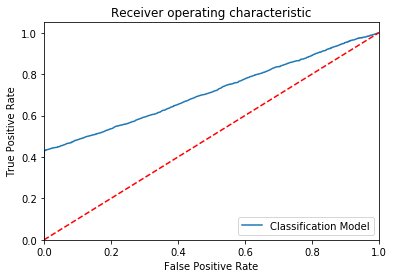

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1650 1702]
 [ 563 4064]]
Outcome values : 
 1650 1702 563 4064
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59      3352
           0       0.70      0.88      0.78      4627

    accuracy                           0.72      7979
   macro avg       0.73      0.69      0.69      7979
weighted avg       0.72      0.72      0.70      7979

Accuracy : 71.6 %
Precision : 74.6 %
Recall : 49.2 %
F1 Score : 0.593
Specificity or True Negative Rate : 87.8 %
Balanced Accuracy : 68.5 %
MCC : 0.409
roc_auc_score: 0.685


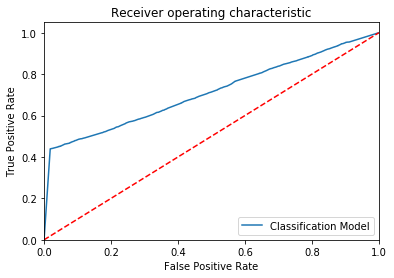

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1883 1469]
 [1086 3541]]
Outcome values : 
 1883 1469 1086 3541
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.56      0.60      3352
           0       0.71      0.77      0.73      4627

    accuracy                           0.68      7979
   macro avg       0.67      0.66      0.67      7979
weighted avg       0.68      0.68      0.68      7979

Accuracy : 68.0 %
Precision : 63.4 %
Recall : 56.2 %
F1 Score : 0.596
Specificity or True Negative Rate : 76.5 %
Balanced Accuracy : 66.4 %
MCC : 0.334
roc_auc_score: 0.664


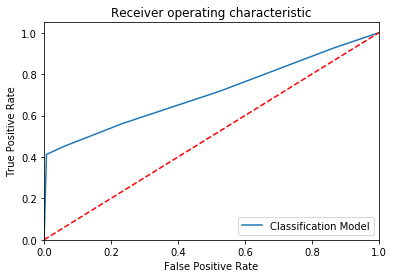

-----------------------------------------------------------------------------------------------------


In [69]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---
   

Model Name:  LogisticRegression()
Confusion matrix : 
 [[1452 1900]
 [   0 4627]]
Outcome values : 
 1452 1900 0 4627
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.43      0.60      3352
           0       0.71      1.00      0.83      4627

    accuracy                           0.76      7979
   macro avg       0.85      0.72      0.72      7979
weighted avg       0.83      0.76      0.74      7979

Accuracy : 76.2 %
Precision : 100.0 %
Recall : 43.3 %
F1 Score : 0.604
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 71.6 %
MCC : 0.554
roc_auc_score: 0.717


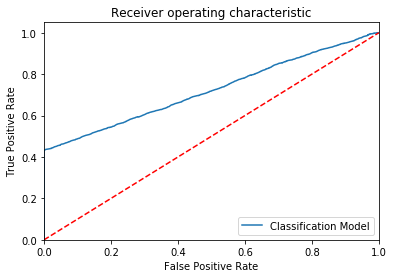

-----------------------------------------------------------------------------------------------------


In [70]:
# Build the Calssification models and compare the results


from sklearn.tree import DecisionTreeClassifier


ModelLR = LogisticRegression()


# Evalution matrix for all the algorithms
MM = [ ModelLR]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
   # y_pred_train = models.predict(x_train)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
   
   

In [71]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1452,1900,0,4627,0.762,1.000,0.433,0.604,1.000,0.554,0.716587,0.716
1,DecisionTreeClassifier(),1654,1698,583,4044,0.714,0.739,0.493,0.592,0.874,0.404,0.683719,0.684
2,"(DecisionTreeClassifier(max_features='auto', r...",1681,1671,620,4007,0.713,0.731,0.501,0.595,0.866,0.400,0.683748,0.684
3,"(ExtraTreeClassifier(random_state=1282121299),...",1650,1702,563,4064,0.716,0.746,0.492,0.593,0.878,0.409,0.685283,0.685
4,KNeighborsClassifier(),1883,1469,1086,3541,0.680,0.634,0.562,0.596,0.765,0.334,0.663522,0.664


In [72]:
predresult=pd.DataFrame({'Product_status':y_test,'Product_status-Pred':y_pred})

In [73]:
final=df.merge(predresult,left_index=True,right_index=True)

In [74]:
final.head()

,fulfilment,shipservicelevel,category,size,amount,shipstate,b2b,rejected,Product_status,Product_status-Pred
0,1,1,4,7,6,22,0,1,1,0
3,1,1,6,5,6,30,0,1,1,0
25,1,1,4,9,6,16,0,0,0,0
32,1,1,4,6,6,1,0,0,0,0
33,1,1,7,6,6,29,0,0,0,0


In [75]:
prestatus_counts = final['Product_status-Pred'].value_counts()
status_counts = final['Product_status'].value_counts()

print(prestatus_counts)
print(status_counts)

0    6527
1    1452
Name: Product_status-Pred, dtype: int64
0    4627
1    3352
Name: Product_status, dtype: int64


In [76]:
f=bk.merge(pd.DataFrame({'Product_status-Pred':y_pred}),left_index=True,right_index=True)

In [77]:
f['rejected'] = f['rejected'].map({1: 'rejected', 0: 'not rejected'})


In [78]:
f['Product_status-Pred'] = f['Product_status-Pred'].map({1: 'rejected', 0: 'not rejected'})


In [79]:
f.head(2)

,fulfilment,saleschannel,shipservicelevel,category,size,amount,shipstate,b2b,rejected,Product_status-Pred
0,Merchant,Amazon.in,Standard,Set,S,6.474847,MAHARASHTRA,False,rejected,not rejected
1,Merchant,Amazon.in,Standard,kurta,3XL,6.008813,KARNATAKA,False,not rejected,rejected


In [80]:
f.to_csv(r'C:\Users\eswar.melam\OneDrive - Qentelli\Desktop\Project\final1.csv',index=False)

In [81]:
f.columns

Index(['fulfilment', 'saleschannel', 'shipservicelevel', 'category', 'size',
       'amount', 'shipstate', 'b2b', 'rejected', 'Product_status-Pred'],
      dtype='object')

In [82]:
import joblib

joblib.dump(models, 'log.joblib')  # Replace with your desired file name


['log.joblib']

In [83]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the actual labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7618749216693821


Confusion Matrix:
[[4627    0]
 [1900 1452]]


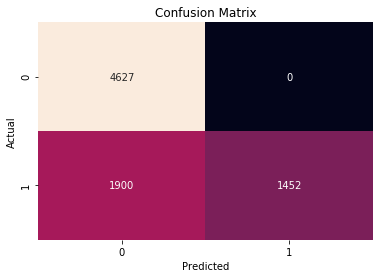

In [84]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True,fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()